# Linear model selection and model regularization
----
선형모형을 다시 돌아보자.

$$ Y = \beta_0 + \beta_1 X_1 + \cdots + \beta_p X_p + \epsilon $$

선형모형은 간단함에도 불구하고, interpretablity가 좋고, 종종 좋은 predictive performance를 보인다.

이 장에서는 선형모형의 기본적인 장점은 유지하면서 단점을 보완하는 대안들을 살펴본다.

### Why consider alternatives?

* Prediction accuracy : 만약 $p > n$인 경우, 일반적인 least square estimation을 적용할 수 없다. 추정될 모수의 수를 제한하여 추정량의 분산을 줄이고 예측 정확성을 높인다.

* Model interpretability : 불필요한 feature 변수를 제외하여 모형을 보다 해석 가능하도록 만든다. feature selection 혹은 variable selection이 자동으로 이루어지는 방법에 대해 알아본다.

### 세가지 방법

* Subset selection : $p$개의 predictor 중에서 반응변수와 연관이 있을 것으로 생각되는 부분 집합을 식별하는 방법.

* Shrinkage (regularization) : $p$개의 predictor를 모형 적합에 사용하지만, 그 중의 일부 predictor들의 해당되는 계수는 0 혹은 0과 매우 가까운 값으로 추정된다. 

* Dimension reduction : $p$개의 predictor를 $M$-dimensional subspace로 투영하는 방법.

## Subset selection

$p$개의 predictor가 있을 때, $k=1, 2, \cdots, p$에 대하여 다음을 실행한다.

* 각 $k$에 대하여 정확히 $\binom{p}{k}$개의 가능한 모형이 있다. 이 모형들에 대해 모두 적합을 진행한다.

  * 각 $k$에 대하여 적합된 모형 중 가장 적합이 잘된 모형이 있을 것이다. 이를 $\mathcal M_k$라 하자.
  
  * 한편 predictor가 없는 단순한 평균 모형은 $\mathcal M_0$라고 하겠다.
  
* $\mathcal M_0, \mathcal M_1, \cdots, \mathcal M_p$ 중에서 best인 모형을 찾는다. 

  * Best를 찾기 위해서 cross-validated prediction error, $C_p$ (AIC), BIC 혹은 adjusted $R^2$ 등이 이용될 수 있다.

## Shrinkage methods

적절한 constraint 혹은 regularization 방법을 통해 불필요한 추정치를 0으로 가깝게 만드는 방법이다.

### Ridge regression

Least square 방식을 다시 돌아보자. 이 방법에서는 다음을 최소화하는 다음을 최소화하는 $\beta$들의 값을 찾는다.

$$ \mathrm{RSS} = \sum_{i=1}^{n} \left( y_i - \beta - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2 $$

반면 ridge regression에서는 다음을 최소화하는 $\beta$들의 값을 찾는다.

$$ \sum_{i=1}^{n} \left( y_i - \beta - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2 + \lambda \sum_{j=1}^{p} \beta_j^2 = \mathrm{RSS} + \lambda \sum_{j=1}^{p} \beta_j^2 $$

여기서 $\lambda \geq 0 $으로 tuning parameter라고 불리운다.

이 추정량을 $\hat \beta^{R}$이라 하겠다.

$\lambda \sum_{j=1}^{p} \beta_j^2$는 shrinkage penalty라고 불리우며, $\beta$들이 0에 가까울수록 작아진다.

적절한 $\lambda$를 선택하는 것이 중요하며 이는 cross-validation 방법을 통해 선택한다.

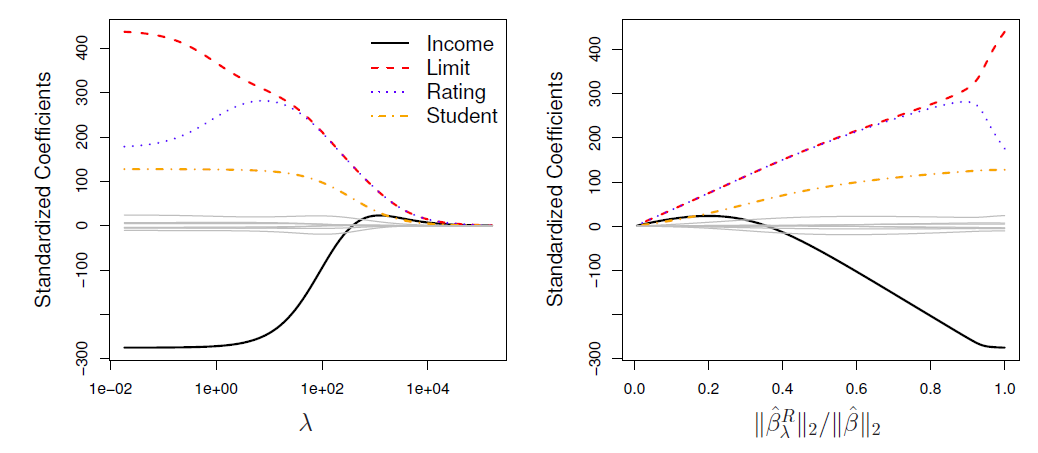

위 그림의 왼쪽에서 보듯 $\lambda$가 커지면 결국 모든 $\beta$들의 추정치는 0에 가까워진다.

오른쪽 그림에서는 x-축에 $ \dfrac{|| \hat \beta_\lambda^R ||_2}{|| \hat \beta ||_2} $를 표현하였다.

여기서 $|| \cdot ||_2$는 $\ell_2$-norm으로서 다음으로 정의한다.

$$ || \beta ||_2 = \sqrt{\sum_{j=1}^{p} \beta_j^2} $$

한편, ridge regression에서는 predictor들을 **표준화**하여 모형을 적합하는 것이 좋다.


$$ \tilde x_{ij} = \frac{x_{ij}}{\sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_{ij} - \bar x_j)^2}} $$

 특히, 정규화를 진행하는 경우에 표준화가 필수적이다. 정규화는 모든 입력 변수(feature)가 비슷한 스케일일 때 효과적으로 작동하기 때문.


### Bias-variance tradeoff

50개의 데이터와 45개의 predictor를 이용한 시뮬레이션 실험. 실험에서는 모두 non-zero coefficient를 가정하였다.

아래 그림에서 검은 선이 squared bias, 초록색이 variance, test error가 자주색이다.

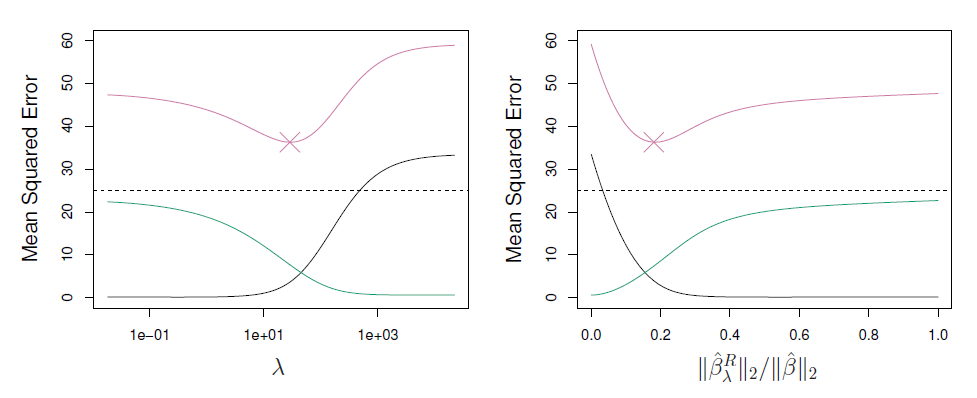

## Lasso 

Ridge regression은 $\lambda$에 따라 coefficient들의 값을 0에 가깝게 보내기는 하지만 완전히 0이 되는 것이 아니기 때문에 최종 모형에는 결국 총 $p$개의 predictor들이 모두 포함된다.

Lasso는 ridge의 대안으로, 다음을 최소화하는 $\beta$들을 찾으며 이를 $\hat \beta_\lambda^L$이라고 하겠다.

$$ \sum_{i=1}^{n} \left( y_i - \beta - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2 + \lambda \sum_{j=1}^{p} |\beta_j| = \mathrm{RSS} + \lambda \sum_{j=1}^{p} |\beta_j| $$

통계적 용어로 이야기하자면, lasso는 $\ell_1$ penalty를 사용하고 ridge는 $\ell_2$ penaltiy를 사용하는 것이다.

Ridge와 마찬가지로 lasso 또한 coefficient 추정치를 0으로 보내지만 ridge와 달리 $\lambda$가 충분히 크면 완전히 0의 값이 된다.

따라서 lasso는 일종의 variable selection 역할을 한다.

Lasso는 sparse 모형을 만들어낸다고도 한다.

마찬가지로 적절한 $\lambda$의 값을 선택하는 것이 중요하며 cross-validation 방법이 이용된다.

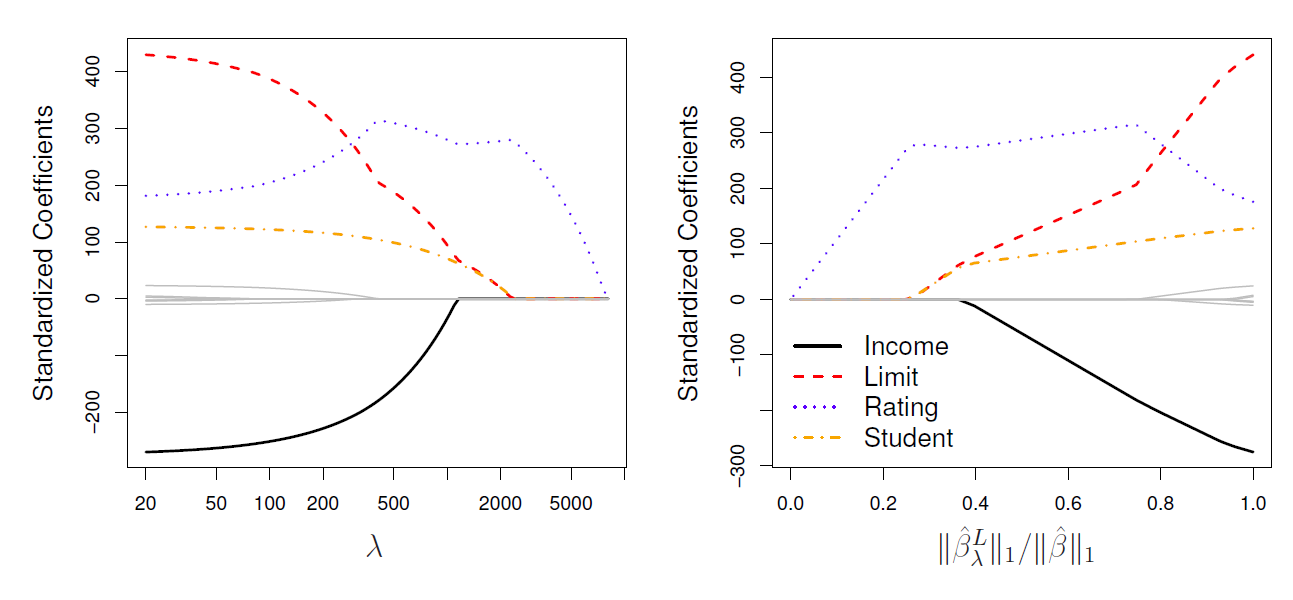

### Ridge와 Lasso의 차이

Lasso와 ridge regression은 각각 결국 다음의 문제를 해결하는 것과 같다.

$$ \arg \min_{\beta} \sum_{i=1}^{n} \left( y_i - \beta - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2  \text{ subject to }  \sum_{j=1} |\beta_j| \leq s $$

$$ \arg \min_{\beta} \sum_{i=1}^{n} \left( y_i - \beta - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2  \text{ subject to }  \sum_{j=1} \beta_j^2 \leq s $$

그림으로 표현하자면 다음과 같으며, 단순히 Ridge와 Lasso 중 어느 것이 더 낫다고 결론을 지을 수는 없다.

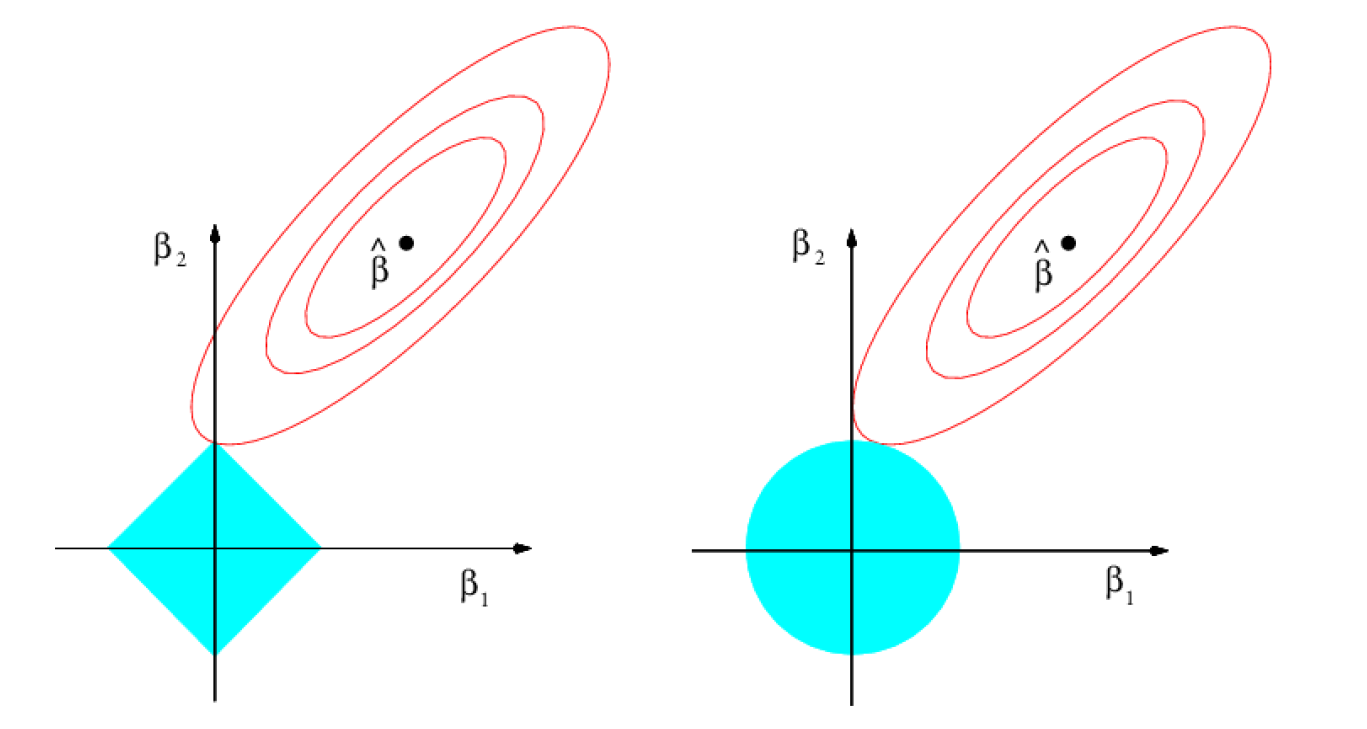

### 모형 선택

앞서 이야기했듯이 $\lambda$는 cross-validation 방법을 통해 정한다.

아래는 ridge regression의 cross-validation 방법을 통해 선택한 $\lambda$의 예제이다.

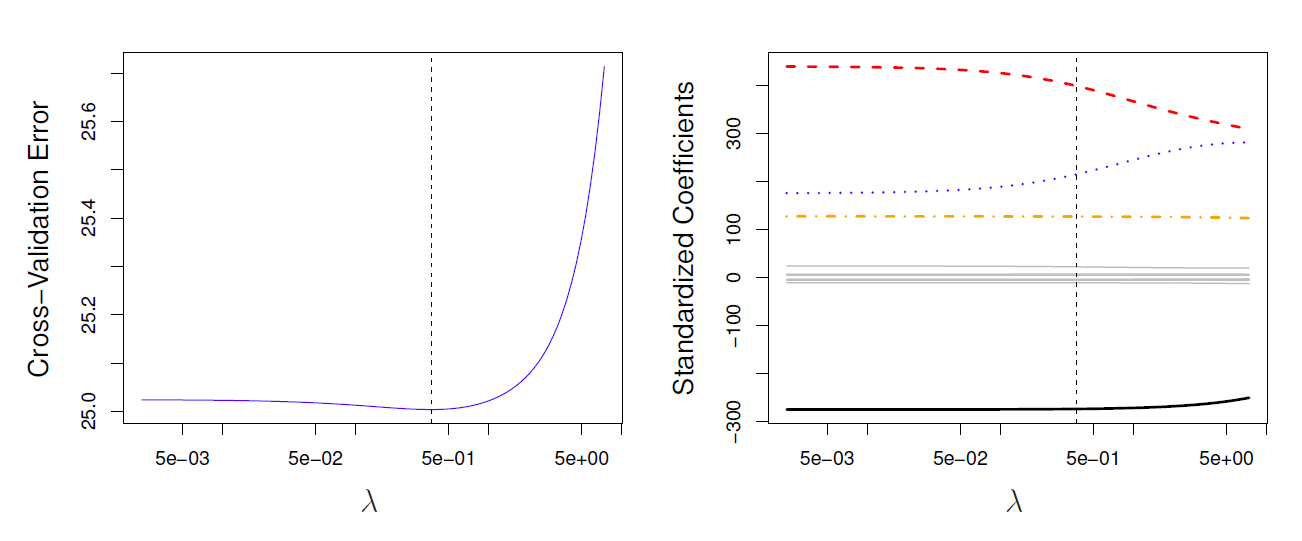

아래는 lasso에서 10-fold cross-validation을 이용하여 $\lambda$의 값을 정하는 예제이다.

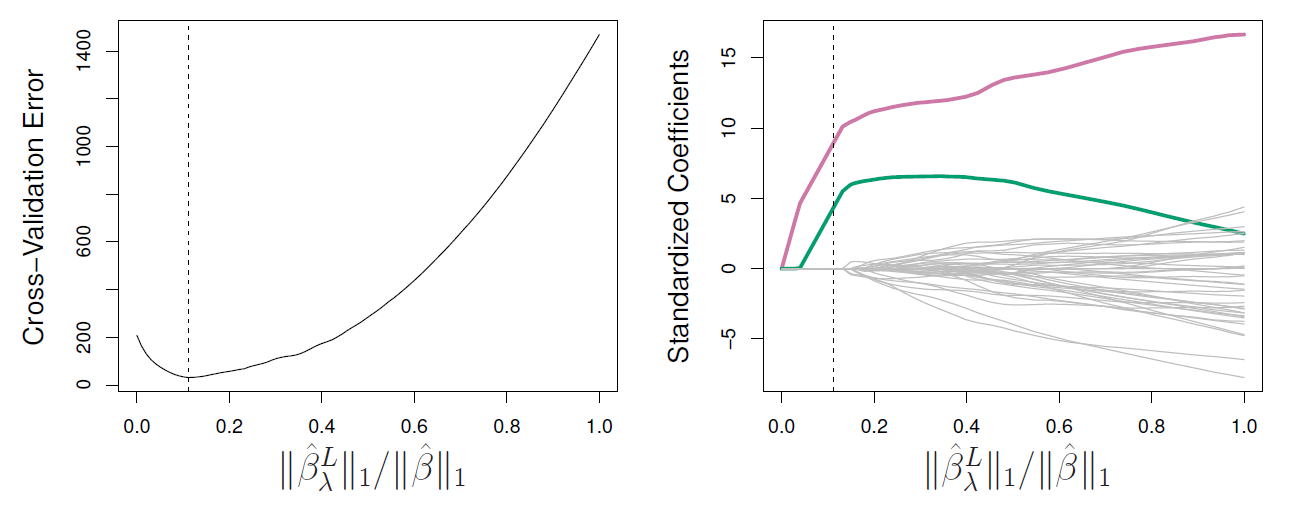

## 엘라스틱넷 (elastic net)

Ridge와 Lasso를 절충한 모델.

$$ \sum_{i=1}^{n} \left( y_i - \beta - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2 + r \lambda \sum_{j=1}^{p} |\beta_j| + \frac{1-r}{2} \lambda \sum_{j=1}^{p} \beta_j^2$$

혼합 정도는 혼합 비율 $r$을 조절하여 사용한다.

## sklearn 예제

Boston housing dataset

In [1]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

In [2]:
import pandas as pd
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [3]:
pd.DataFrame(y)

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [4]:
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X, y)

In [5]:
pd.DataFrame(X_tn)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.01360,75.0,4.00,0.0,0.410,5.888,47.6,7.3197,3.0,469.0,21.1,396.90,14.80
1,20.71620,0.0,18.10,0.0,0.659,4.138,100.0,1.1781,24.0,666.0,20.2,370.22,23.34
2,0.08826,0.0,10.81,0.0,0.413,6.417,6.6,5.2873,4.0,305.0,19.2,383.73,6.72
3,0.17171,25.0,5.13,0.0,0.453,5.966,93.4,6.8185,8.0,284.0,19.7,378.08,14.44
4,4.09740,0.0,19.58,0.0,0.871,5.468,100.0,1.4118,5.0,403.0,14.7,396.90,26.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,0.01301,35.0,1.52,0.0,0.442,7.241,49.3,7.0379,1.0,284.0,15.5,394.74,5.49
375,8.79212,0.0,18.10,0.0,0.584,5.565,70.6,2.0635,24.0,666.0,20.2,3.65,17.16
376,0.02498,0.0,1.89,0.0,0.518,6.540,59.7,6.2669,1.0,422.0,15.9,389.96,8.65
377,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50


[`sklearn.preprocessing.StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)와 훈련 데이터를 이용하여 표준화를 하겠다.

In [6]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

In [7]:
pd.DataFrame(X_tn_std)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.438684,2.719581,-1.027760,-0.293189,-1.227581,-0.602404,-0.721722,1.694428,-0.729678,0.413007,1.233101,0.433397,0.353544
1,2.570843,-0.493858,1.056869,-0.293189,0.932812,-3.048690,1.115879,-1.298766,1.742653,1.597970,0.822629,0.134991,1.583883
2,-0.427831,-0.493858,-0.020929,-0.293189,-1.201552,0.137073,-2.159539,0.703910,-0.611948,-0.573461,0.366549,0.286095,-0.810524
3,-0.415700,0.577288,-0.860694,-0.293189,-0.854501,-0.493370,0.884426,1.450161,-0.141028,-0.699777,0.594589,0.222902,0.301679
4,0.154976,-0.493858,1.275681,-0.293189,2.772183,-1.189513,1.115879,-1.184869,-0.494218,0.016014,-1.685812,0.433397,2.027611
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,-0.438770,1.005747,-1.394418,-0.293189,-0.949940,1.288924,-0.662105,1.557089,-0.965138,-0.699777,-1.320948,0.409239,-0.987727
375,0.837445,-0.493858,1.056869,-0.293189,0.282091,-1.053919,0.084859,-0.867254,1.742653,1.597970,0.822629,-3.964972,0.693544
376,-0.437030,-0.493858,-1.339715,-0.293189,-0.290543,0.309012,-0.297390,1.181331,-0.965138,0.130299,-1.138516,0.355776,-0.532473
377,-0.424053,-0.493858,0.434437,3.410767,-0.012902,0.075567,0.849357,-0.233778,-0.494218,-0.747897,-0.910476,0.398054,-0.265948


In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_tn_std, y_tn)

LinearRegression()

In [9]:
print(lr.coef_, lr.intercept_)

[-0.87555441  1.09541655  0.1962791   0.91033821 -1.92722981  3.23813243
 -0.17298863 -3.00655988  2.69954839 -1.82698308 -2.12599981  1.02423221
 -3.44311569] 23.103693931398425


### sklearn에서의 Ridge, Lasso regression

[```sklearn.linear_model.Ridge```](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

minimize ```||y - Xw||^2_2 + alpha * ||w||^2_2```

In [10]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)   
ridge.fit(X_tn_std, y_tn)
print(ridge.coef_, ridge.intercept_)

[-0.86176463  1.07401981  0.16254824  0.91611708 -1.89244566  3.2461025
 -0.17816832 -2.96891089  2.60869356 -1.74027842 -2.11548753  1.02291211
 -3.43028846] 23.103693931398425


다양한 튜닝 파라미터 `alpha`에 대해 진행해 보자.

In [11]:
import numpy as np
from sklearn.metrics import mean_squared_error

alphas = np.array([0.01, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000])

coefs = []
errs = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_tn_std, y_tn)
    coefs.append(ridge.coef_)
    errs.append(mean_squared_error(y_te, ridge.predict(X_te_std)))

In [12]:
pd.DataFrame(coefs)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.875412,1.095195,0.195927,0.910399,-1.926874,3.238216,-0.173042,-3.006177,2.698604,-1.826077,-2.125893,1.024219,-3.442986
1,-0.874135,1.093210,0.192773,0.910941,-1.923683,3.238965,-0.173523,-3.002736,2.690139,-1.817957,-2.124931,1.024102,-3.441817
2,-0.868549,1.084535,0.179050,0.913295,-1.909651,3.242215,-0.175624,-2.987574,2.653236,-1.782659,-2.120694,1.023577,-3.436658
3,-0.861765,1.074020,0.162548,0.916117,-1.892446,3.246103,-0.178168,-2.968911,2.608694,-1.740278,-2.115488,1.022912,-3.430288
4,-0.814201,1.000983,0.052076,0.934641,-1.766736,3.271192,-0.195728,-2.830028,2.305134,-1.458707,-2.076977,1.017286,-3.382080
5,-0.767397,0.930272,-0.047551,0.950446,-1.633867,3.290997,-0.212457,-2.678026,2.020991,-1.208960,-2.035140,1.009600,-3.327269
6,-0.592874,0.676568,-0.341446,0.974385,-1.046380,3.259268,-0.268274,-1.914511,1.056941,-0.527457,-1.820341,0.938114,-2.996436
7,-0.521253,0.577811,-0.431749,0.942119,-0.754392,3.088740,-0.289014,-1.428664,0.654441,-0.371715,-1.664198,0.853530,-2.706539
8,-0.422395,0.454271,-0.496915,0.638936,-0.401079,1.990923,-0.326967,-0.378660,-0.011390,-0.352534,-1.114937,0.534137,-1.665369
9,-0.369750,0.392398,-0.453812,0.442510,-0.350965,1.385687,-0.317896,-0.100151,-0.147705,-0.352698,-0.821183,0.400596,-1.186324


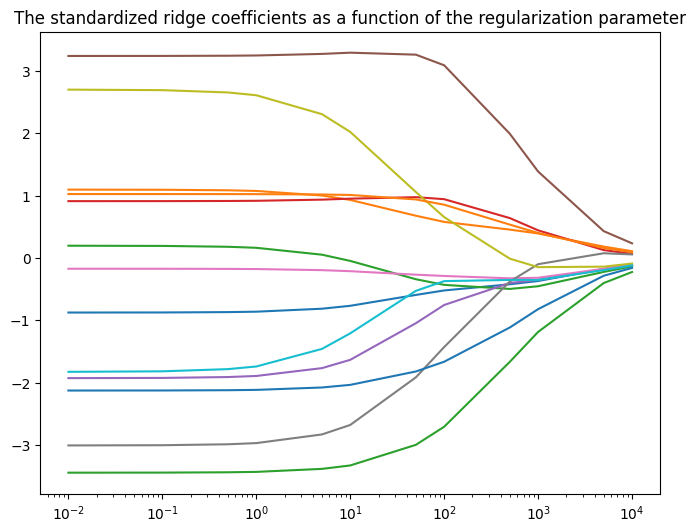

In [13]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(8, 6))

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.title("The standardized ridge coefficients as a function of the regularization parameter")
plt.axis("tight")
plt.show()

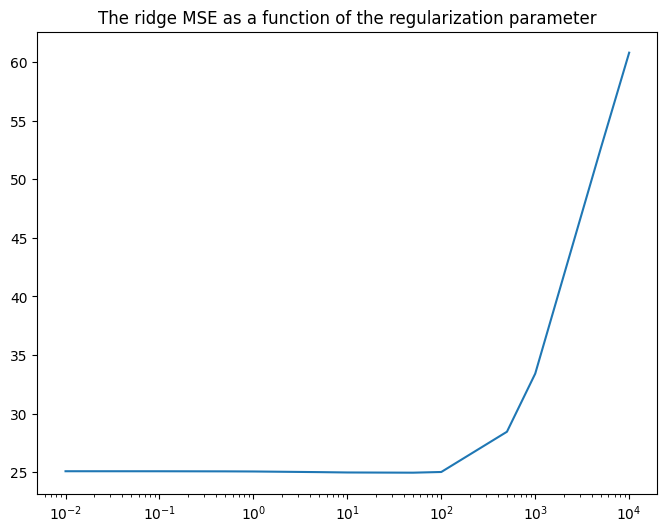

In [14]:
plt.figure(figsize=(8, 6))

ax = plt.gca()
ax.plot(alphas, errs)
ax.set_xscale("log")
plt.title("The ridge MSE as a function of the regularization parameter")
plt.axis("tight")
plt.show()

### [```sklearn.linear_model.Lasso```](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)를 이용한 예제

다음을 최소화한다.

minimize 1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

In [15]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.1) 
lasso.fit(X_tn_std, y_tn)
print(lasso.coef_, lasso.intercept_)

[-0.51082064  0.7002464  -0.          0.90824831 -1.50862517  3.37268537
 -0.         -2.22140484  1.19423714 -0.53139226 -1.99421179  0.94910835
 -3.50333145] 23.103693931398425


In [16]:
L_coefs = []
L_errs = []

alphas = np.arange(0.1, 10, 0.1)

for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_tn_std, y_tn)
    L_coefs.append(lasso.coef_)
    L_errs.append(mean_squared_error(y_te, lasso.predict(X_te_std)))

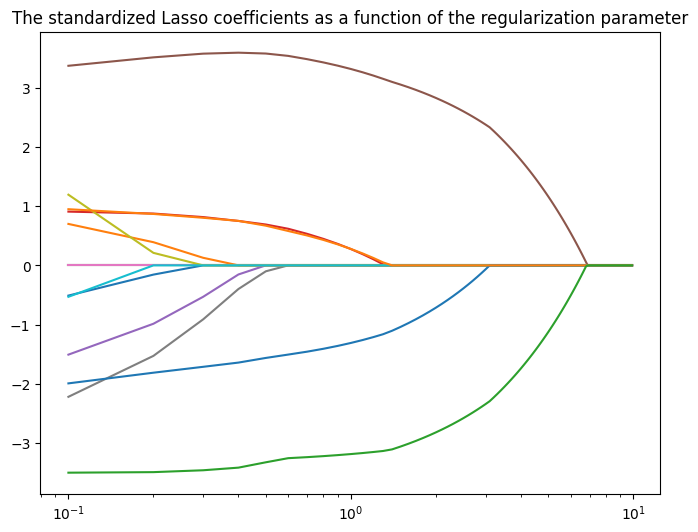

In [17]:
plt.figure(figsize=(8, 6))

ax = plt.gca()
ax.plot(alphas, L_coefs)
ax.set_xscale("log")
plt.title("The standardized Lasso coefficients as a function of the regularization parameter")
plt.axis("tight")
plt.show()

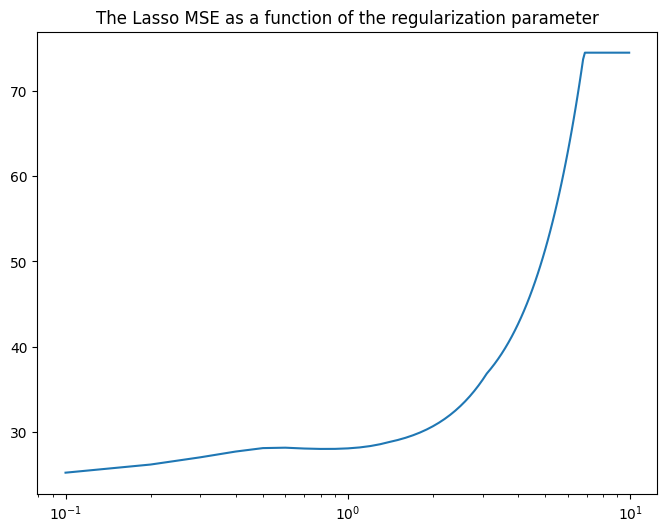

In [18]:
plt.figure(figsize=(8, 6))

ax = plt.gca()
ax.plot(alphas, L_errs)
ax.set_xscale("log")
plt.title("The Lasso MSE as a function of the regularization parameter")
plt.axis("tight")
plt.show()

### with K-fold cross validation

앞 단원에서 공부했던 k-fold cross validation 방법을 다시 적용하여 보자.

In [19]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.preprocessing import StandardScaler

alphas = np.arange(0.01, 10, 0.01)

errs_alpha = [] # alpha별 에러

for a in alphas:
    
    kfold_errs = []  # 각 폴드 별 에러
    
    kf = KFold(n_splits = 5, shuffle=True, random_state=1)
    
    for train_index, test_index in kf.split(X):
    
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        std_scale = StandardScaler()
        std_scale.fit(X_train)
        
        X_train_std = std_scale.transform(X_train)
        X_test_std = std_scale.transform(X_test)
        
        ridge = Ridge(alpha = a)
        ridge.fit(X_train_std, y_train)
        
        kfold_errs.append(mean_squared_error(y_test, ridge.predict(X_test_std)))
        
    errs_alpha.append(np.mean(kfold_errs))

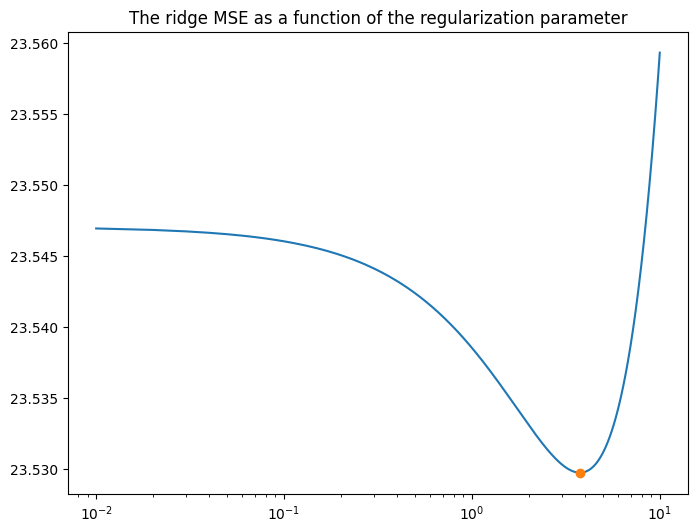

In [20]:
plt.figure(figsize=(8, 6))

ax = plt.gca()
ax.plot(alphas, errs_alpha)
ax.set_xscale("log")
ax.plot(alphas[np.argmin(errs_alpha)], np.min(errs_alpha), marker = 'o')

plt.title("The ridge MSE as a function of the regularization parameter")
plt.axis("tight")
plt.show()

혹은 더 간단하게 `cross_val_score`를 이용한 버전을 살펴보자.

* 아래 코드에서  `'neg_mean_squared_error'`는 MSE의 음수값을 나타내므로, mse 평균을 구할 때는 다시 마이너스를 취한다.

* `cross_val_score` 함수의 기본 동작은 높은 값일수록 좋은 성능으로 간주하도록 되어 있어, 음의 평균 제곱 오차를 사용하도록 구현되어 있다.

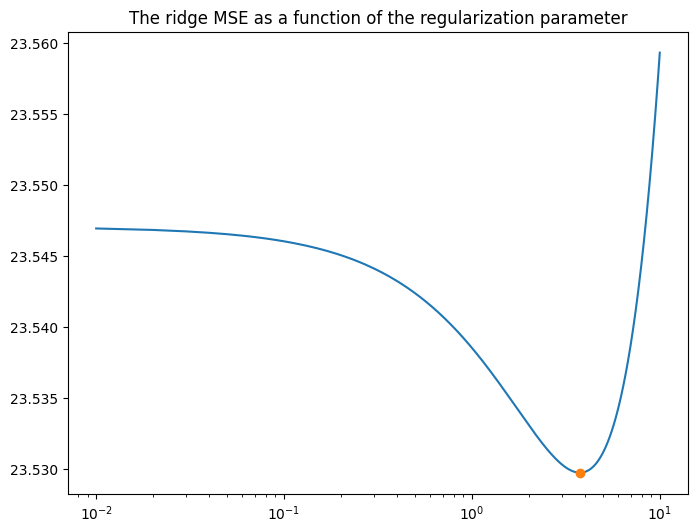

In [21]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# alpha 값들
alphas = np.arange(0.01, 10, 0.01)
errs_alpha = []
cv = KFold(n_splits=5, shuffle=True, random_state=1)

for a in alphas:
    
    # 파이프라인: 표준화 + Ridge 회귀
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge(alpha=a))
    ])
    
    neg_mse_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_squared_error')
    
    # 음수를 취하여 평균 MSE 저장
    errs_alpha.append(np.mean(-neg_mse_scores))


plt.figure(figsize=(8, 6))

ax = plt.gca()
ax.plot(alphas, errs_alpha)
ax.set_xscale("log")
ax.plot(alphas[np.argmin(errs_alpha)], np.min(errs_alpha), marker = 'o')

plt.title("The ridge MSE as a function of the regularization parameter")
plt.axis("tight")
plt.show()

Lasso에 대해서도 비슷하게 해 보자.

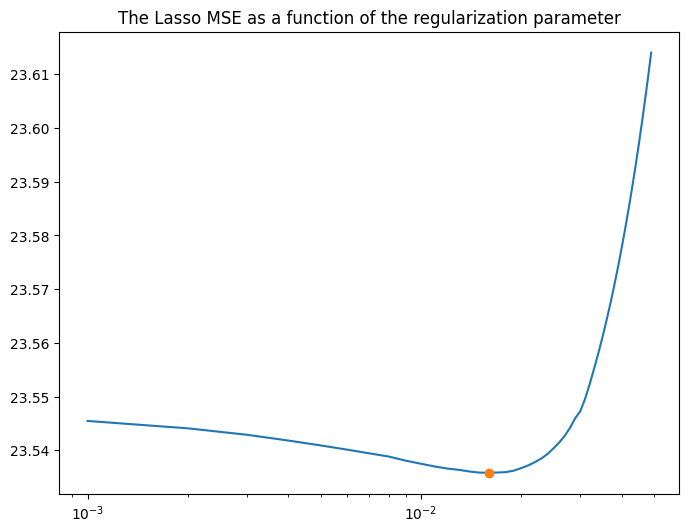

In [22]:

alphas = np.arange(0.001, 0.05, 0.001)
errs_alpha = [] # alpha별 에러

cv = KFold(n_splits=5, shuffle=True, random_state=1)

for a in alphas:
    
    # 파이프라인: 표준화 + Ridge 회귀
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Lasso(alpha=a))
    ])
    
    neg_mse_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_squared_error')
    
    # 음수를 취하여 평균 MSE 저장
    errs_alpha.append(np.mean(-neg_mse_scores))


plt.figure(figsize=(8, 6))

ax = plt.gca()
ax.plot(alphas, errs_alpha)
ax.set_xscale("log")
ax.plot(alphas[np.argmin(errs_alpha)], np.min(errs_alpha), marker = 'o')

plt.title("The Lasso MSE as a function of the regularization parameter")
plt.axis("tight")
plt.show()

### sklearn에서의 ElasticNet

[```sklearn.linear_model.ElasticNet```](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

minimize 1 / (2 * n_samples) * ||y - Xw||^2_2 + alpha * l1_ratio * ||w||_1 + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2

In [23]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic.fit(X_tn_std, y_tn)

ElasticNet(alpha=0.1)

In [24]:
print(elastic.coef_, elastic.intercept_)

[-0.57509839  0.71081435 -0.16800388  0.94638415 -1.30057156  3.34117474
 -0.14719461 -2.14464953  1.21655103 -0.58899185 -1.92215711  0.95760434
 -3.26604943] 23.103693931398425


In [25]:
pred_lr = lr.predict(X_te_std)
pred_ridge = ridge.predict(X_te_std)
pred_lasso = lasso.predict(X_te_std)
pred_elastic = elastic.predict(X_te_std)

In [26]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_te, pred_lr))
print(mean_squared_error(y_te, pred_ridge))
print(mean_squared_error(y_te, pred_lasso))
print(mean_squared_error(y_te, pred_elastic))

25.080217401303585
23.062787500354364
74.51568813040956
25.045729576961993


### Hitter example

여러 지표를 바탕으로 야구(타자) 선수의 연봉을 예측하는 문제

In [27]:
import pandas as pd
df = pd.read_csv('https://gist.githubusercontent.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad/raw/d9bcf657f97201394a59fffd801c44347eb7e28d/Hitters.csv')
df = df.dropna(axis=0)
df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A


In [28]:
from sklearn.model_selection import train_test_split

y = df["Salary"]
X = df.iloc[:, 1:]
X = X.drop(["Salary", "League", "Division", "NewLeague"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [29]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()
std_scale.fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [30]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)   
ridge.fit(X_train_std, y_train)
print(ridge.coef_, ridge.intercept_)

[-246.42805011  264.88475517   -5.54167382  -75.80890554   46.03838682
  127.33971097  -51.44440098 -343.2733472   230.32780088   24.16855149
  530.48738373   15.40064464 -197.10032253   73.4061376    33.20291612
  -16.67586529] 542.4903654822334


In [31]:
import numpy as np
from sklearn.metrics import mean_squared_error

alphas = np.array([0.01, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000])

coefs = []
errs = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_std, y_train)
    coefs.append(ridge.coef_)
    errs.append(mean_squared_error(y_test, ridge.predict(X_test_std)))

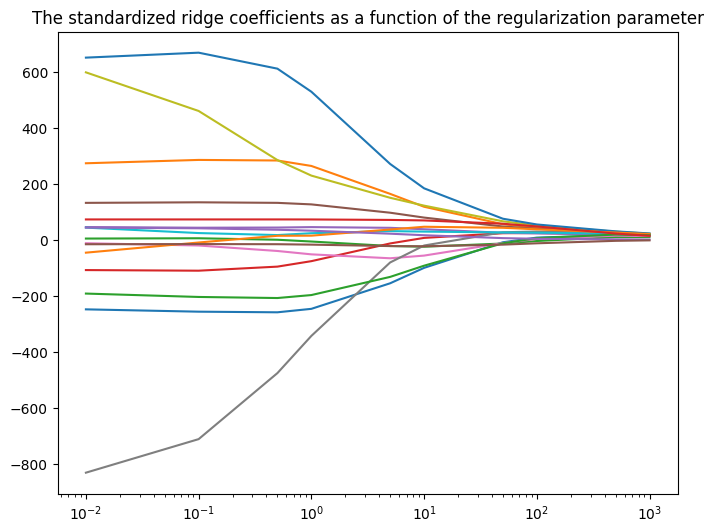

In [32]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(8, 6))

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.title("The standardized ridge coefficients as a function of the regularization parameter")
plt.axis("tight")
plt.show()

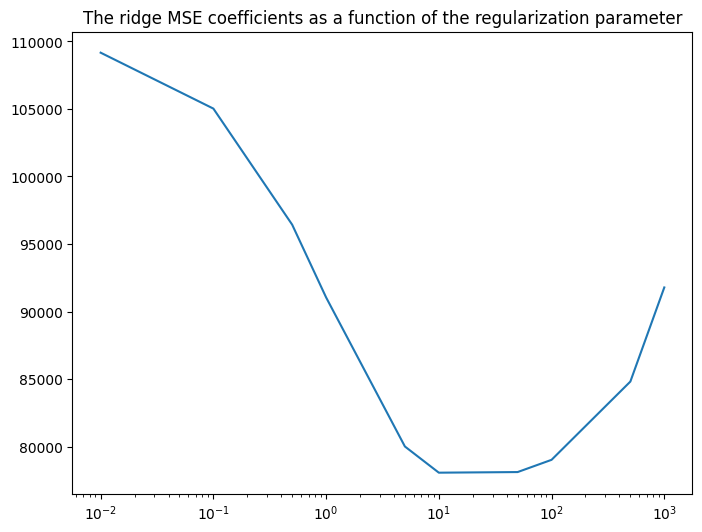

In [33]:
plt.figure(figsize=(8, 6))

ax = plt.gca()
ax.plot(alphas, errs)
ax.set_xscale("log")
plt.title("The ridge MSE coefficients as a function of the regularization parameter")
plt.axis("tight")
plt.show()

In [34]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 1) 
lasso.fit(X_train_std, y_train)
print(lasso.coef_, lasso.intercept_)

[-242.91994574  272.76447474    0.          -95.23010573   44.86733116
  127.04283468  -26.52695592 -513.97111454  273.17987167    7.98770987
  664.1591673     8.20088237 -203.56021394   73.75799843   31.66501416
  -10.92423971] 542.4903654822334


C:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.103e+04, tolerance: 4.349e+03
  model = cd_fast.enet_coordinate_descent(


In [35]:
L_coefs = []
L_errs = []

alphas = np.array([0.5, 1, 2.5, 5, 10, 25, 50, 100])

for a in alphas:
    lasso = Lasso(alpha=a, max_iter=2000)
    lasso.fit(X_train_std, y_train)
    L_coefs.append(lasso.coef_)
    L_errs.append(mean_squared_error(y_test, lasso.predict(X_test_std)))

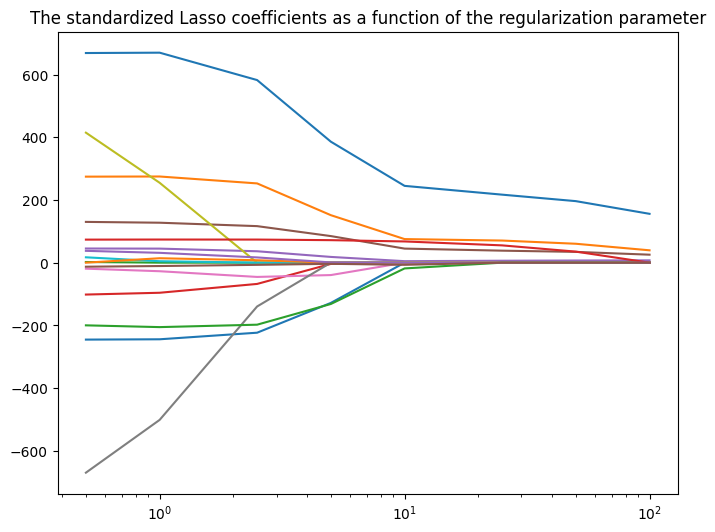

In [36]:
plt.figure(figsize=(8, 6))

ax = plt.gca()
ax.plot(alphas, L_coefs)
ax.set_xscale("log")
plt.title("The standardized Lasso coefficients as a function of the regularization parameter")
plt.axis("tight")
plt.show()

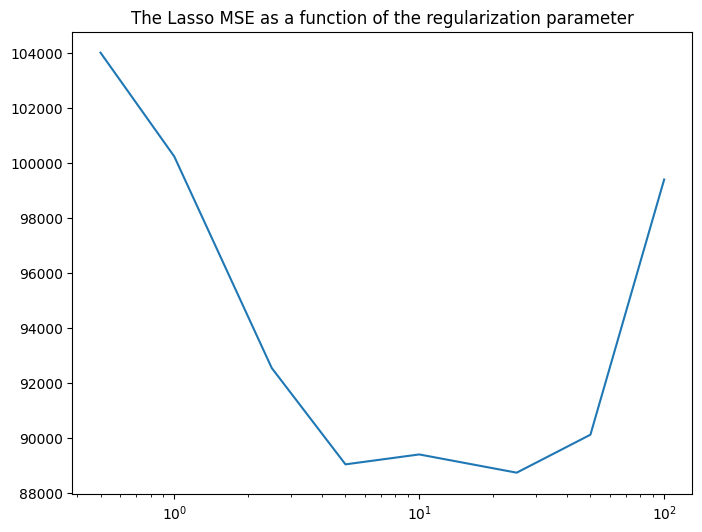

In [37]:
plt.figure(figsize=(8, 6))

ax = plt.gca()
ax.plot(alphas, L_errs)
ax.set_xscale("log")
plt.title("The Lasso MSE as a function of the regularization parameter")
plt.axis("tight")
plt.show()

#### With k-fold cross-validation

Ridge regression을 이용하여 앞에서 했던 내용을 반복해 보자.

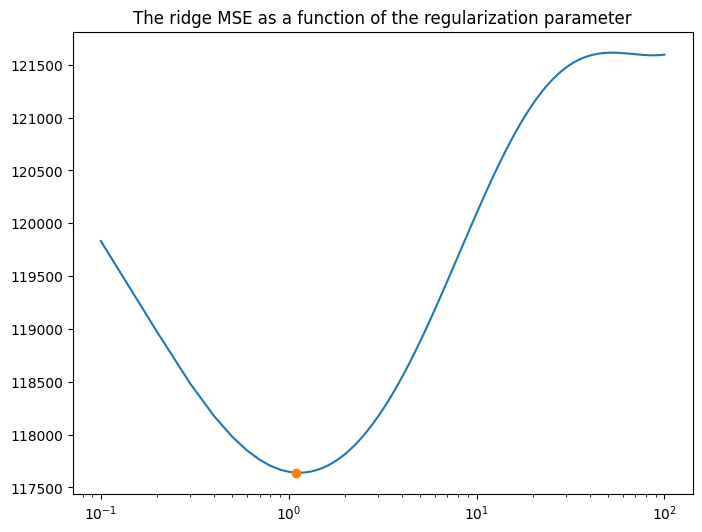

In [38]:
from sklearn.model_selection import KFold
alphas = np.arange(0.1, 100, 0.1)

errs_alpha = [] # alpha별 에러

cv = KFold(n_splits=5, shuffle=True, random_state=1)

for a in alphas:
    
    # 파이프라인: 표준화 + Ridge 회귀
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge(alpha=a))
    ])
    
    neg_mse_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_squared_error')
    
    # 음수를 취하여 평균 MSE 저장
    errs_alpha.append(np.mean(-neg_mse_scores))


plt.figure(figsize=(8, 6))

ax = plt.gca()
ax.plot(alphas, errs_alpha)
ax.set_xscale("log")
ax.plot(alphas[np.argmin(errs_alpha)], np.min(errs_alpha), marker = 'o')

plt.title("The ridge MSE as a function of the regularization parameter")
plt.axis("tight")
plt.show()

Lasso regression을 이용하여 같은 방법을 다시 적용하여 보았다.

In [39]:
from sklearn.model_selection import KFold
alphas = np.arange(1, 10, 0.02)

errs_alpha = [] # alpha별 에러

cv = KFold(n_splits=5, shuffle=True, random_state=1)

for a in alphas:
    
    # 파이프라인: 표준화 + Ridge 회귀
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Lasso(alpha=a, max_iter=2000))
    ])
    
    neg_mse_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_squared_error')
    
    # 음수를 취하여 평균 MSE 저장
    errs_alpha.append(np.mean(-neg_mse_scores))


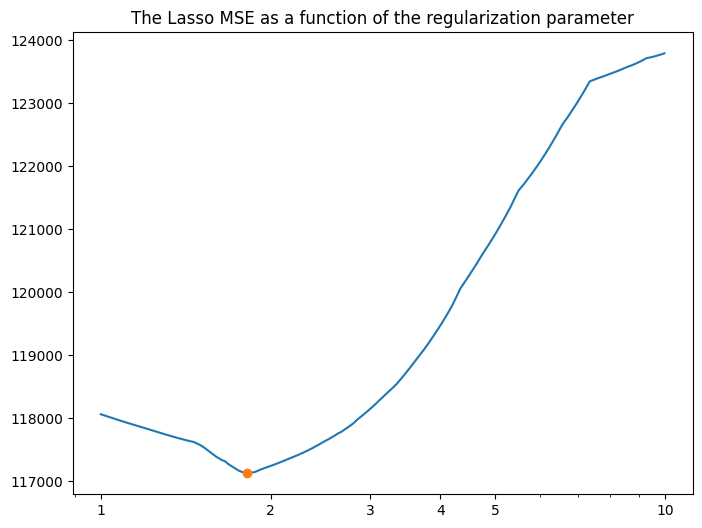

In [40]:
plt.figure(figsize=(8, 6))

ax = plt.gca()
ax.plot(alphas, errs_alpha)
ax.set_xscale("log")
ax.plot(alphas[np.argmin(errs_alpha)], np.min(errs_alpha), marker = 'o')
plt.xticks([1, 2, 3, 4, 5, 10], ['1', '2', '3', '4', '5', '10'])

plt.title("The Lasso MSE as a function of the regularization parameter")
plt.axis("tight")
plt.show()